In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import mean

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# find tables within dataframe
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# find column names in Measurements
m_cols = inspector.get_columns('Measurement')
for c in m_cols:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# view measurement head
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# find column names in Station
s_cols = inspector.get_columns('Station')
for c in s_cols:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# view station data
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
dt.timedelta

datetime.timedelta

In [16]:
# find most recent date in database & sort by date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
precip_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()
precip_year

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

Text(0, 0.5, 'inches')

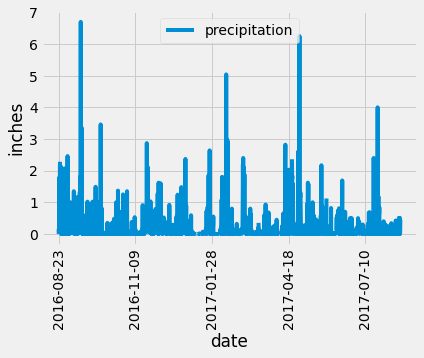

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_year, columns= ['date', 'precipitation'])
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel('date')
plt.ylabel('inches')

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# precip_data = session.query(Measurement.prcp)
# df = pd.DataFrame(precip_data, columns=['precipitation'])
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.name).count()
print(total_stations)

9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
test = session.query(Station.name, func.count(Measurement.station)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for result in test:
    print(result)

('WAIHEE 837.5, HI US', 2772)
('WAIKIKI 717.2, HI US', 2724)
('KANEOHE 838.1, HI US', 2709)
('WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('MANOA LYON ARBO 785.2, HI US', 2612)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('HONOLULU OBSERVATORY 702.2, HI US', 1979)
('PEARL CITY, HI US', 1372)
('UPPER WAHIAWA 874.3, HI US', 511)


In [23]:
sel = [Station.name, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

waihee_data = session.query(*sel).\
    filter(Station.station == "USC00519281").\
    filter(Measurement.station == "USC00519281").all()
print(waihee_data)


[('WAIHEE 837.5, HI US', 54.0, 85.0, 71.66378066378067)]


In [24]:
# Using the station id -- Waihee -- from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

waihee_data = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
print(waihee_data)


[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).all()

waihee_df = pd.DataFrame(waihee_year)
waihee_df.set_index('date', inplace=True)
waihee_df



,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 1.0, 'Waihee Temp Histogram')

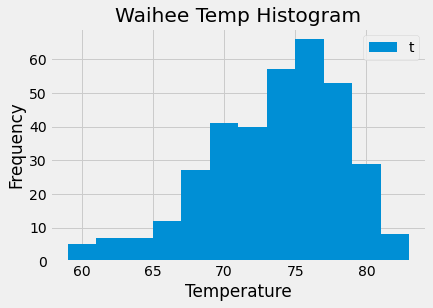

In [26]:
# create histogram of Waihee temp data
waihee_df.hist(column='tobs', grid=True, bins=12)
plt.legend('tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Waihee Temp Histogram")

## Bonus Challenge Assignment

In [27]:
# Identify the average temperature in June at all stations across all available 
# years in the dataset. Do the same for December temperature.
sel = [
      func.avg(Measurement.tobs)]

june_avgs = session.query(*sel).\
    filter(func.strftime('%m', Measurement.date) == '06').\
    filter(Measurement.station == Station.station).\
    group_by(Station.name).\
    order_by(Station.name).all()
june_avgs


[(74.13939393939394),
 (74.05084745762711),
 (76.00537634408602),
 (71.9372197309417),
 (76.6554054054054),
 (73.39473684210526),
 (73.27118644067797),
 (77.55932203389831),
 (76.66810344827586)]

In [28]:
sel = [
      func.avg(Measurement.tobs)]

dec_avgs = session.query(*sel).\
    filter(func.strftime('%m', Measurement.date) == '12').\
    filter(Measurement.station == Station.station).\
    group_by(Station.name).\
    order_by(Station.name).all()
dec_avgs


[(69.6842105263158),
 (71.06944444444444),
 (73.2247191011236),
 (69.29126213592232),
 (71.8348623853211),
 (72.42105263157895),
 (69.90322580645162),
 (71.10952380952381),
 (72.43333333333334)]

In [29]:
# Use the t-test to determine whether the difference in the means, if any, 
# is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
# use paired because we want to compare the averages by station.
stats.ttest_rel(june_avgs, dec_avgs)

Ttest_relResult(statistic=array([6.95696617]), pvalue=array([0.00011759]))

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

results = calc_temps('2017-02-28', '2017-03-05')
results
temps = list(np.ravel(results))
# temps = [result[0] for result in results]
temps

[64.0, 72.02777777777777, 78.0]

([<matplotlib.axis.XTick at 0x7fafd3b50c18>],
 <a list of 1 Text major ticklabel objects>)

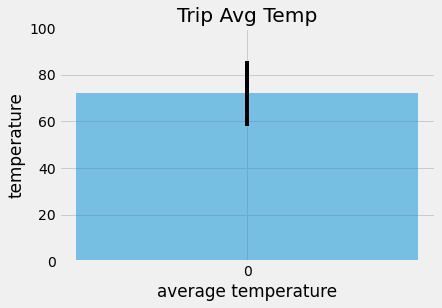

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# fig, ax = plt.subplots()
# x = range(len(temps))
# ax.boxplot(temps, patch_artist=True)
# ax.sex_title('Trip Avg Temp')
# plt.show()
label = ["average temperature"]
y = temps[1]
x = np.arange(len(label))
error = temps[2] - temps[0]

plt.bar(x, y, yerr=error, alpha=0.5, align="center", width=0.1)
# plt.xticks(x, label)
plt.xlabel("average temperature")
plt.ylabel("temperature")
plt.ylim(0,100)
plt.title("Trip Avg Temp")
tick_locations = [value for value in x]
plt.xticks(tick_locations)

# waihee_df.hist(column='tobs', grid=True, bins=12)
# plt.legend('tobs')
# plt.xlabel("Temperature")
# plt.ylabel("Frequency")
# plt.title("Waihee Temp Histogram")

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def calc_rain(start_date, end_date):
    return session.query(func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_rain('2017-02-28', '2017-03-05'))


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
